In [39]:
import numpy as np
import jax.numpy as jnp
from jax.numpy import interp
from jax import jit, partial, random, vmap
from tqdm import tqdm
import pandas as pd
import warnings
import os.path
warnings.filterwarnings("ignore")
np.printoptions(precision=2)
%pylab inline 
matplotlib.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


In [40]:
T_max = 60
# housing unit
H = 1000
# housing price constant
pt = 2*250/1000

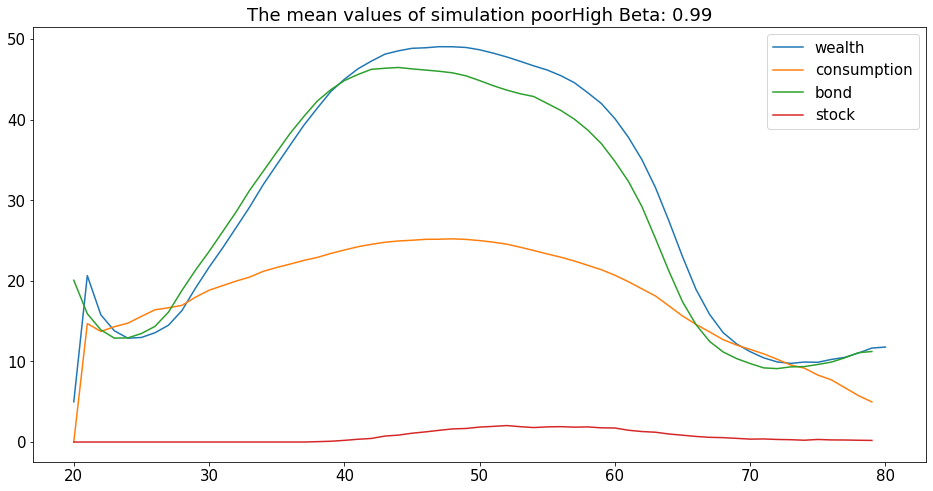

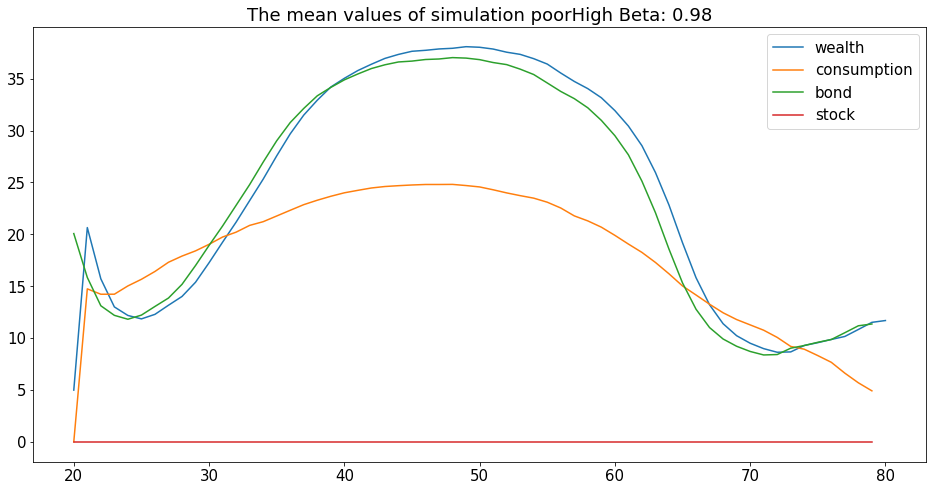

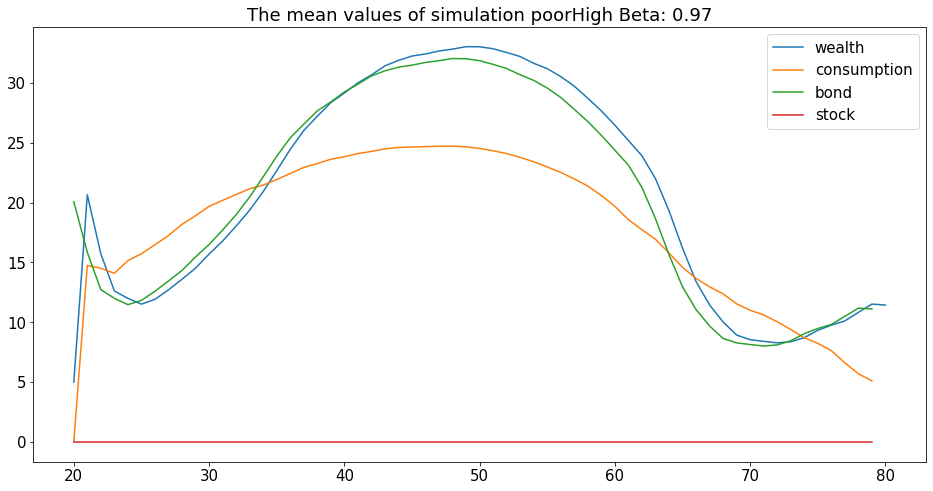

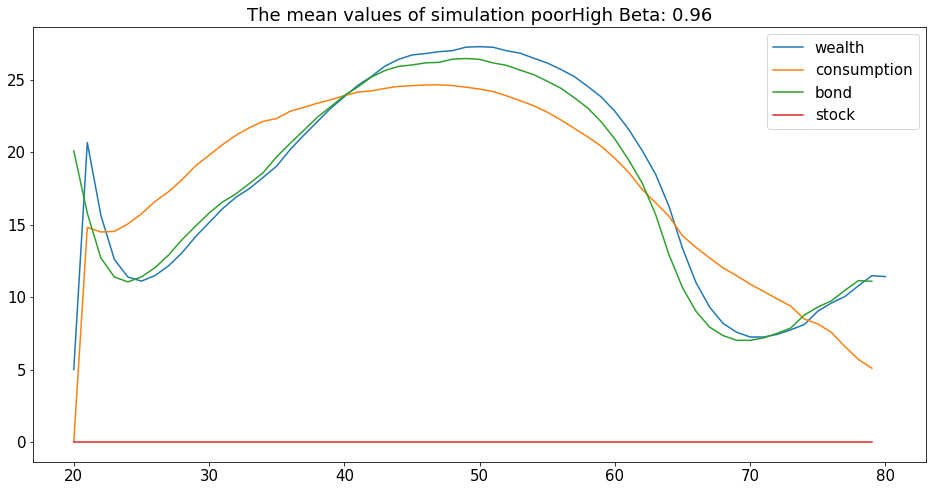

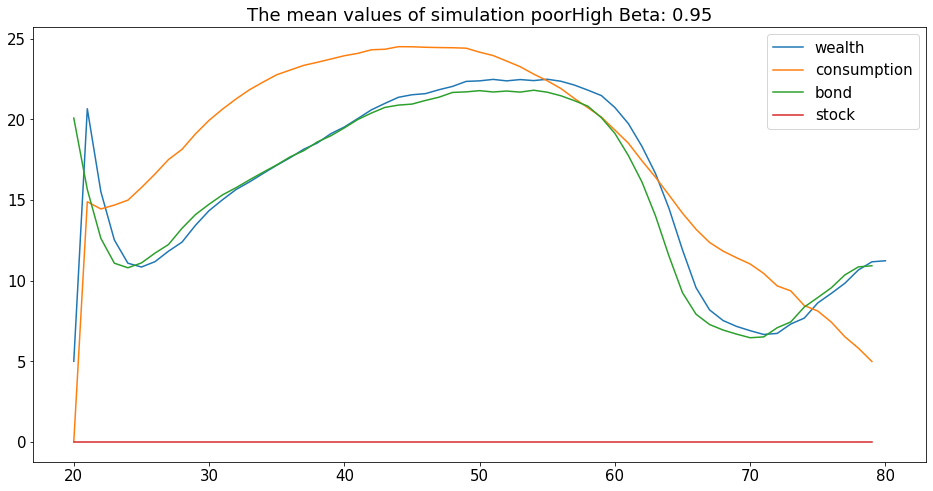

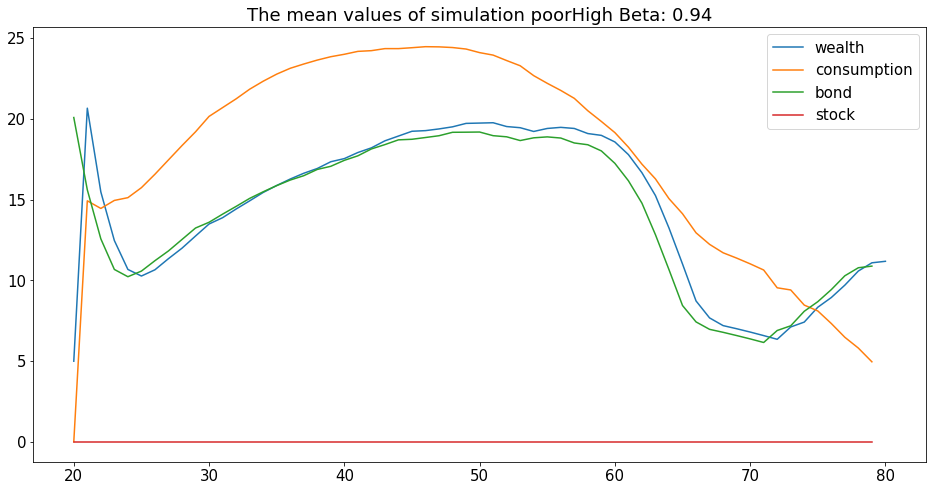

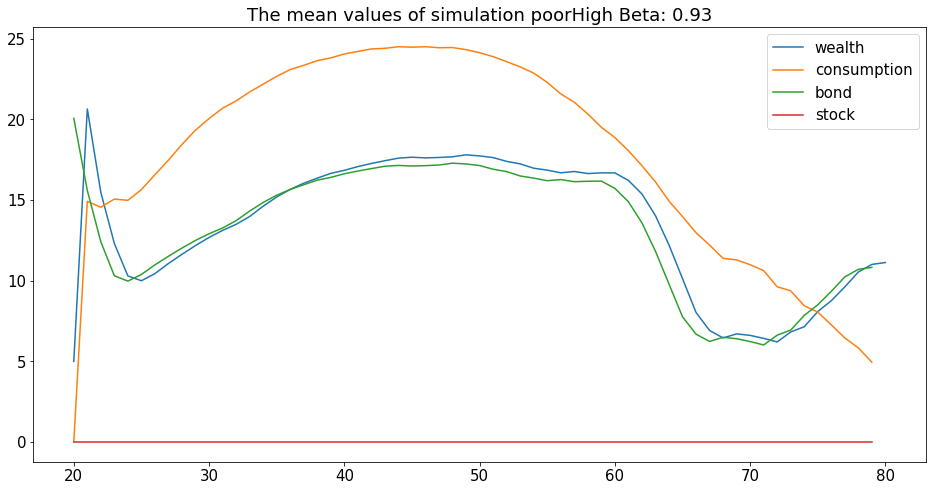

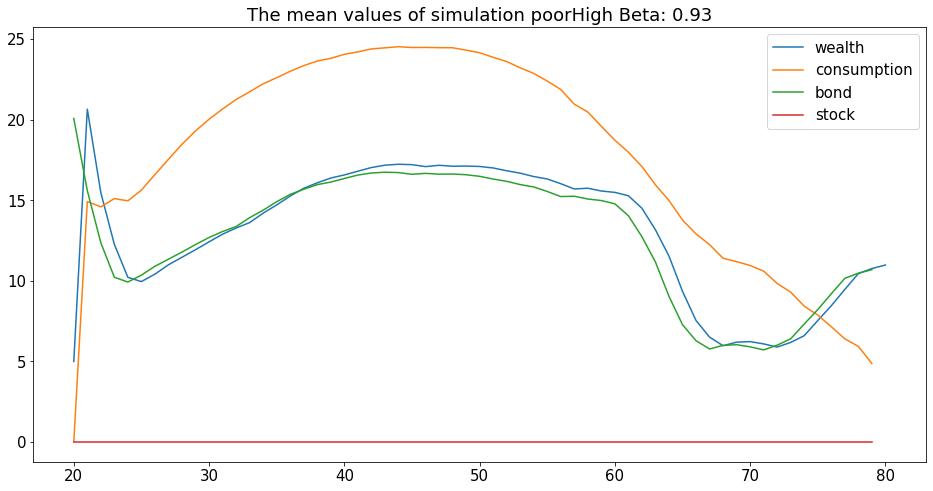

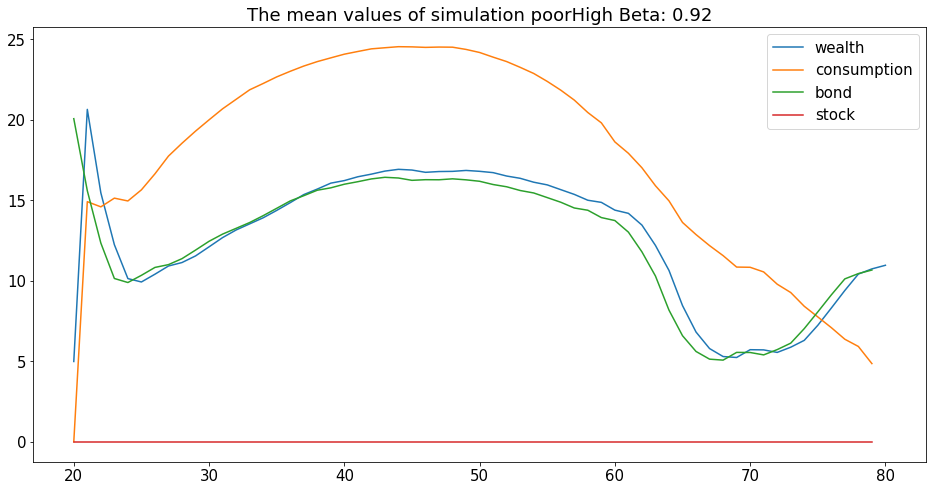

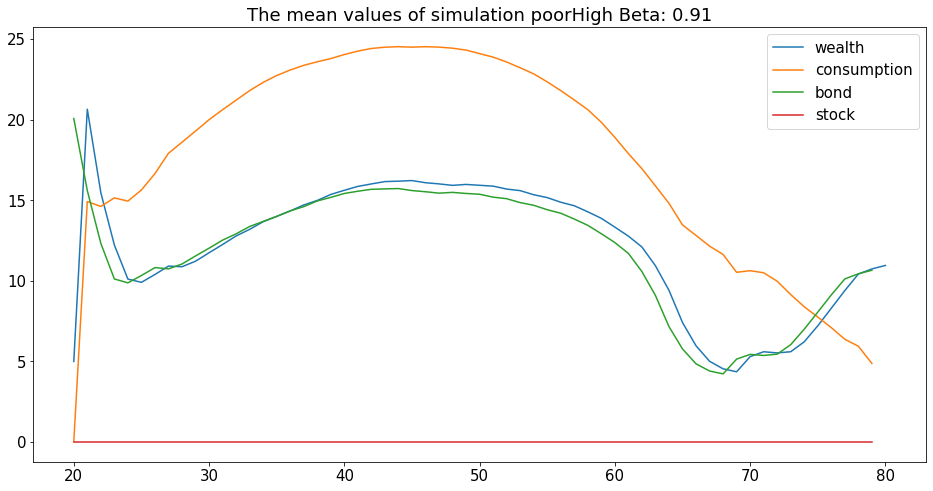

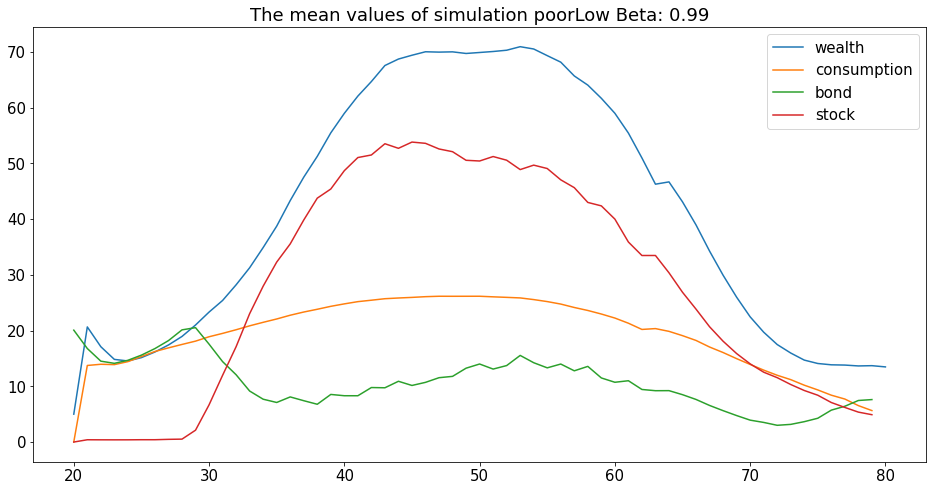

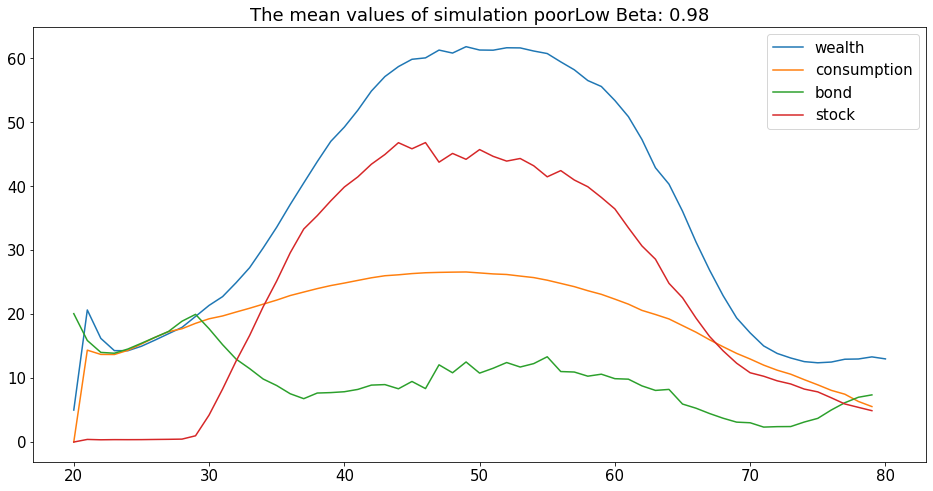

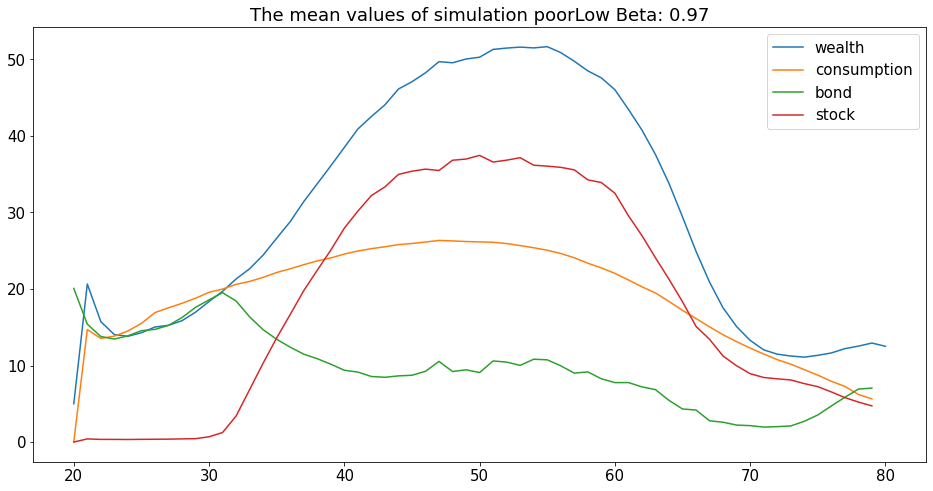

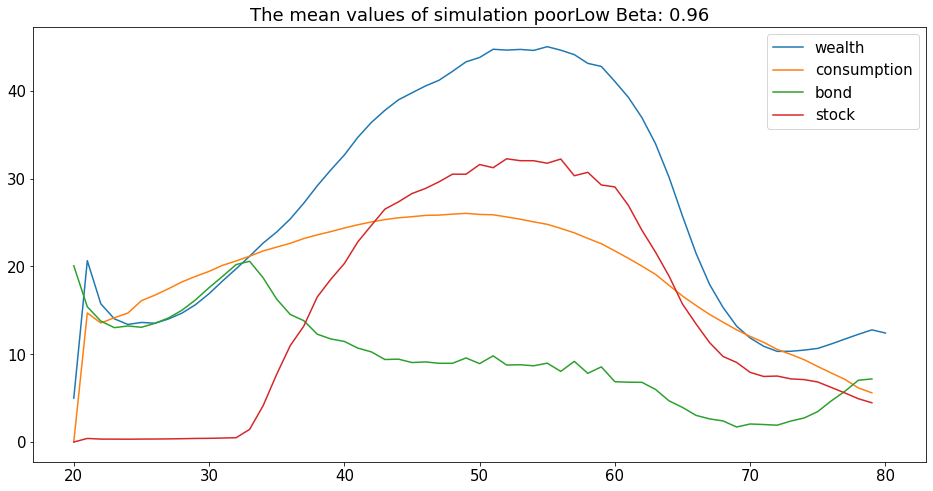

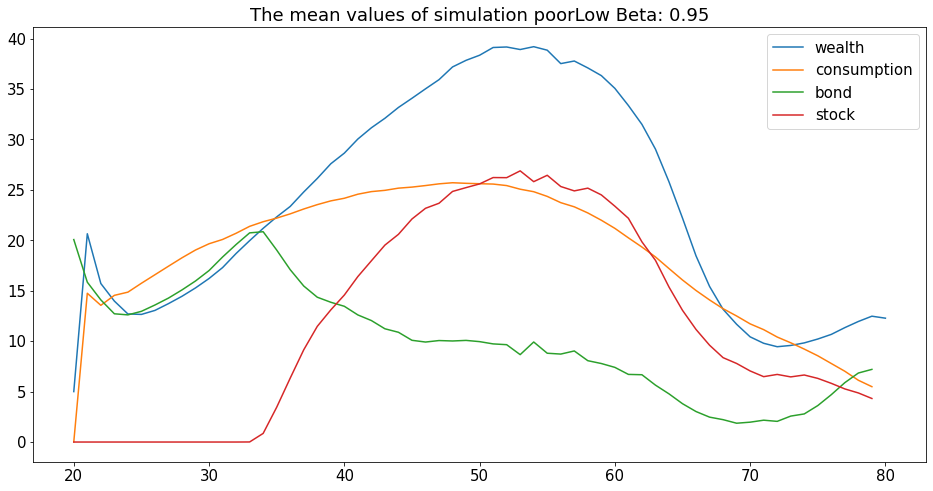

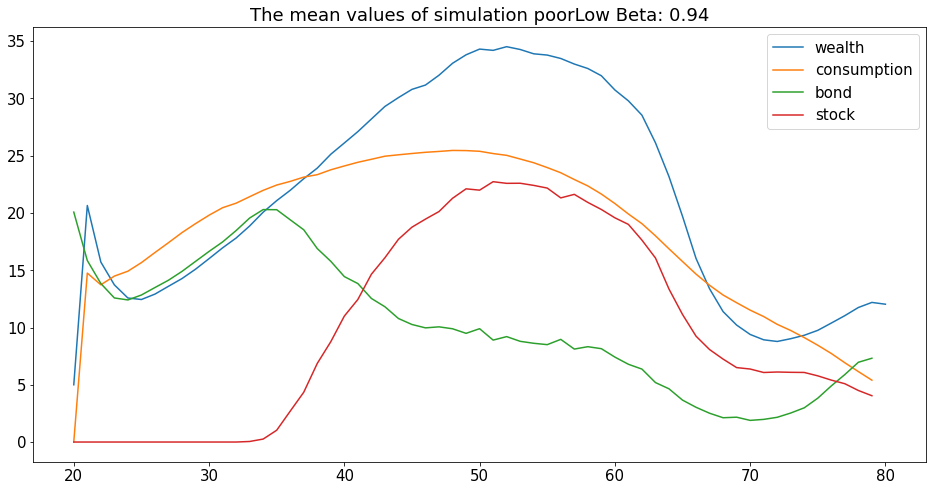

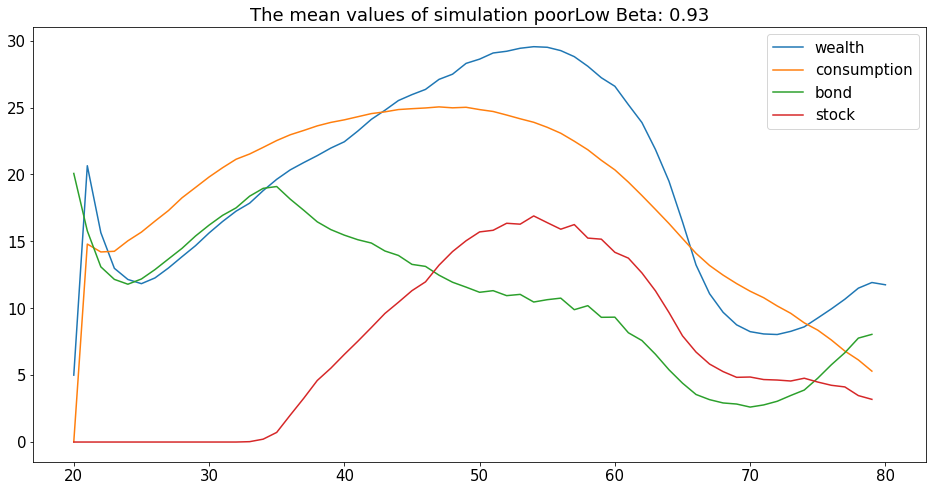

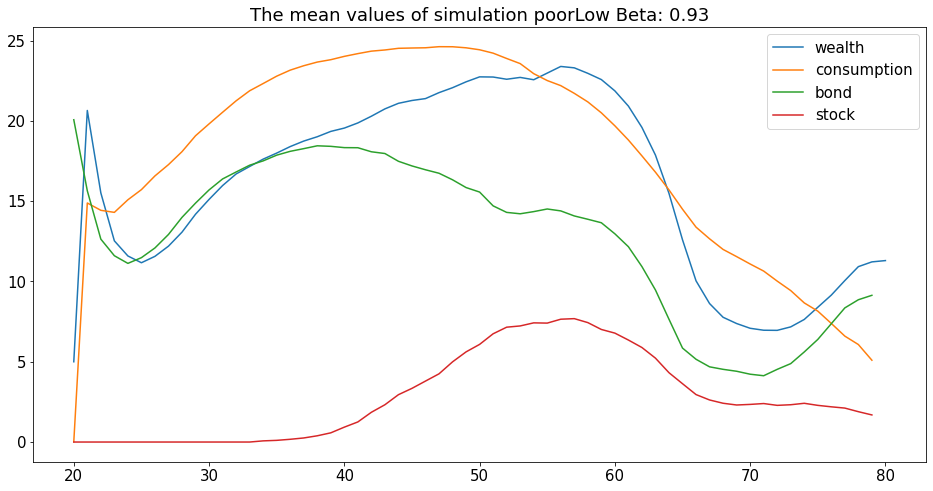

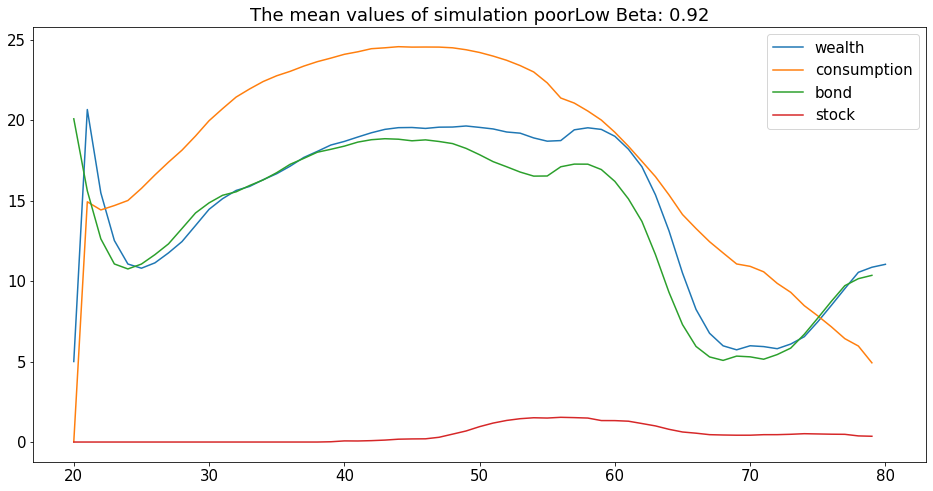

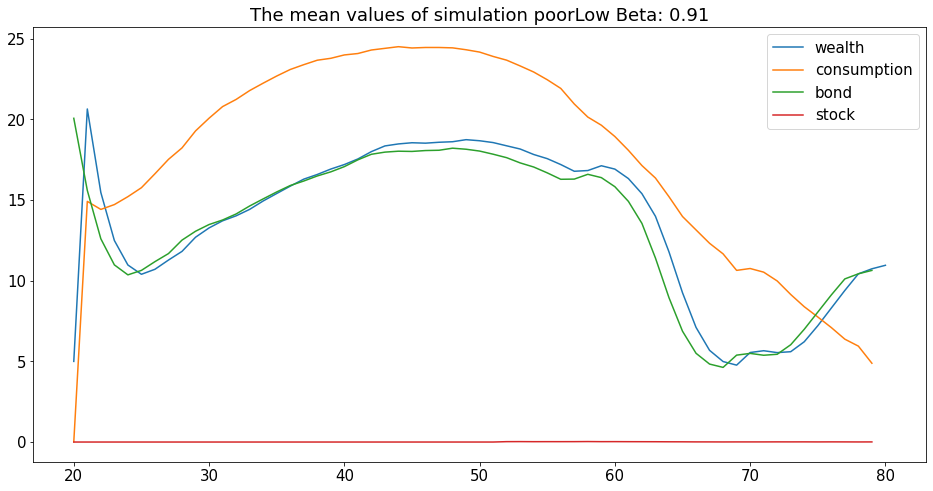

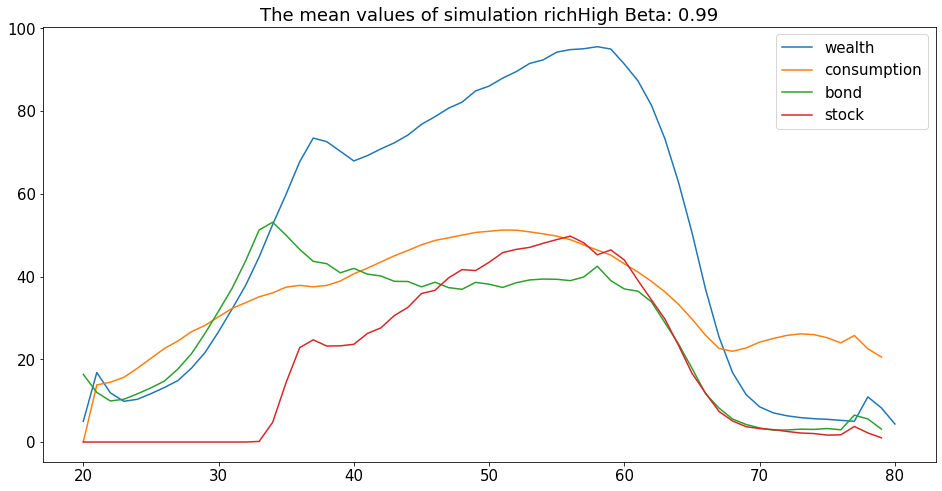

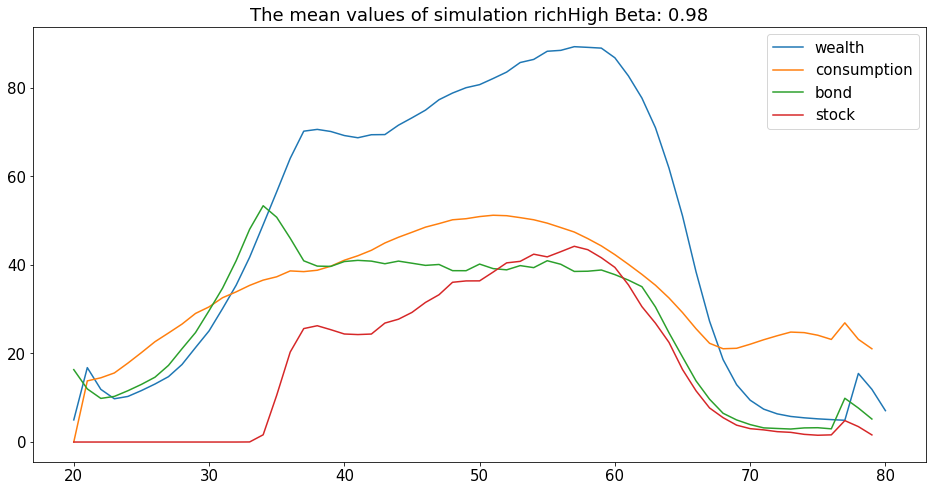

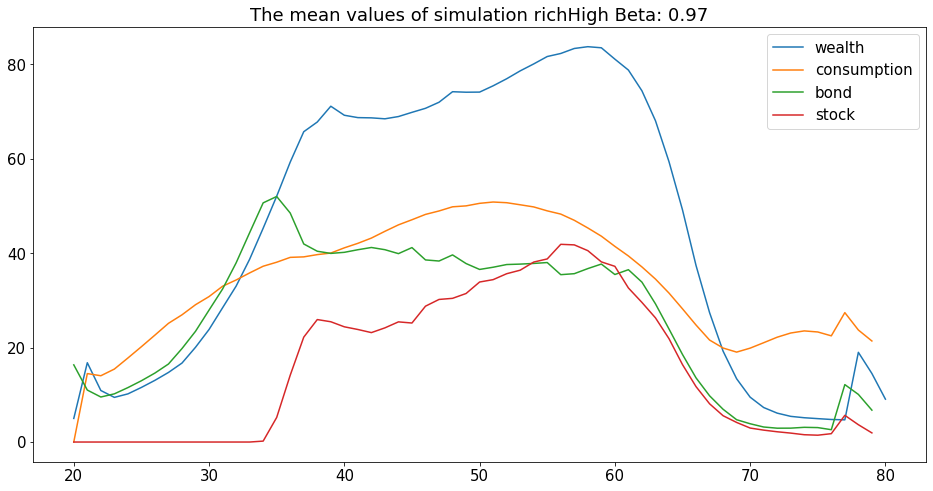

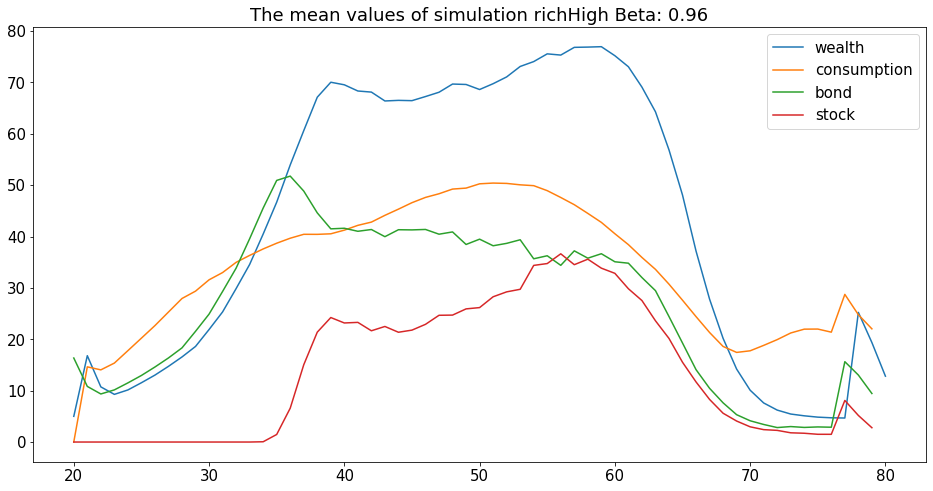

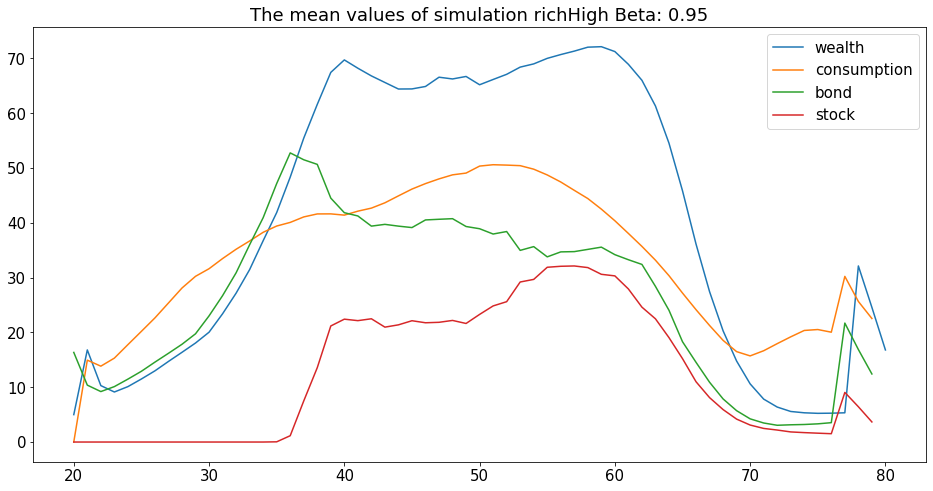

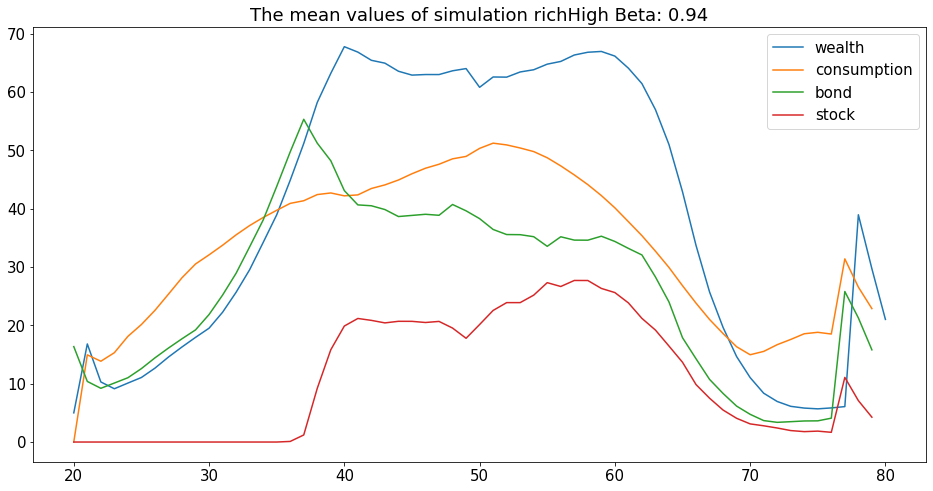

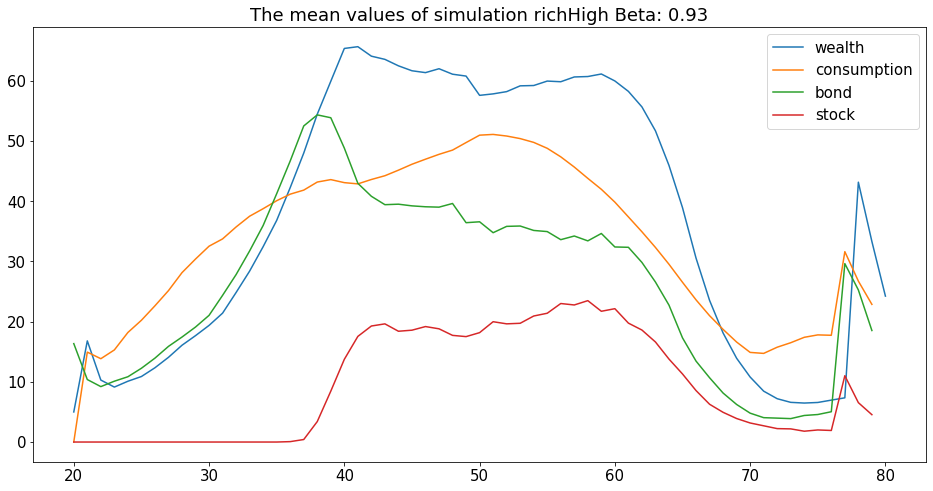

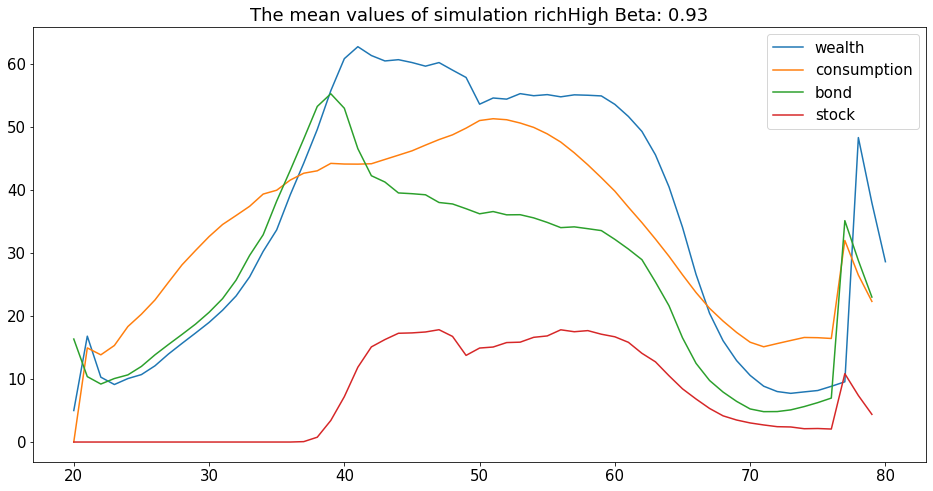

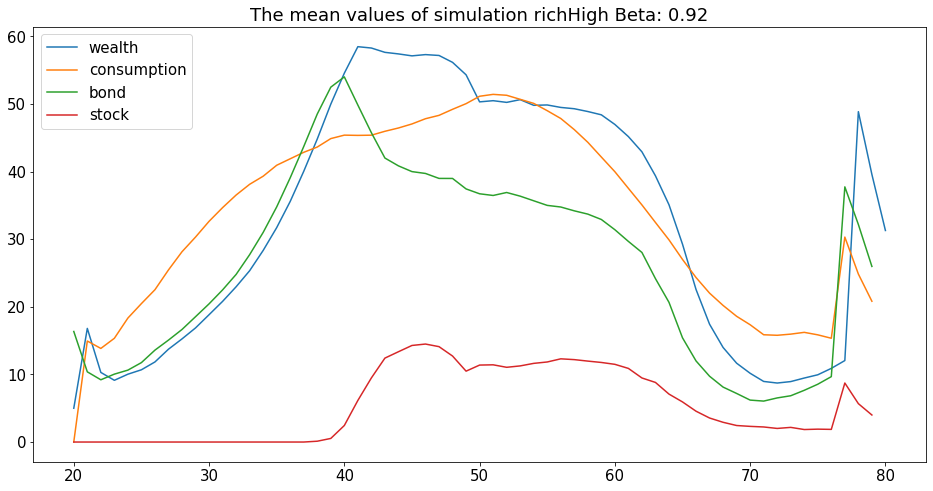

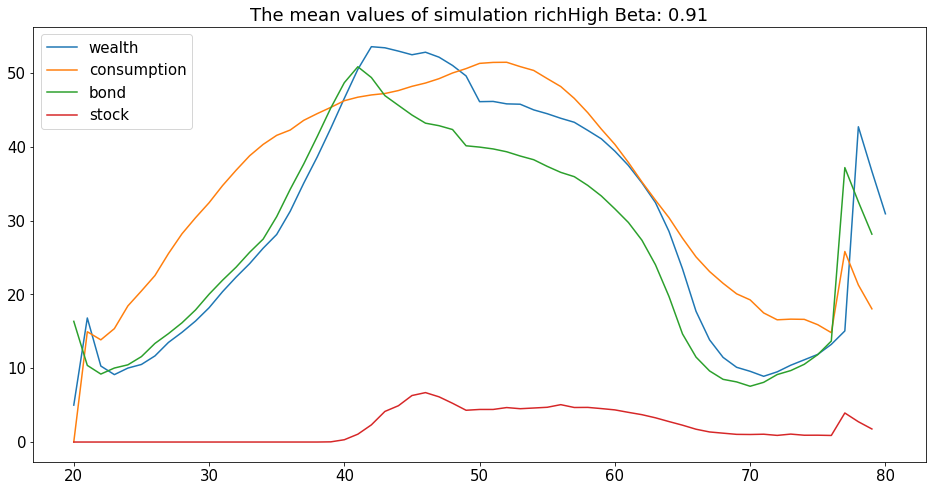

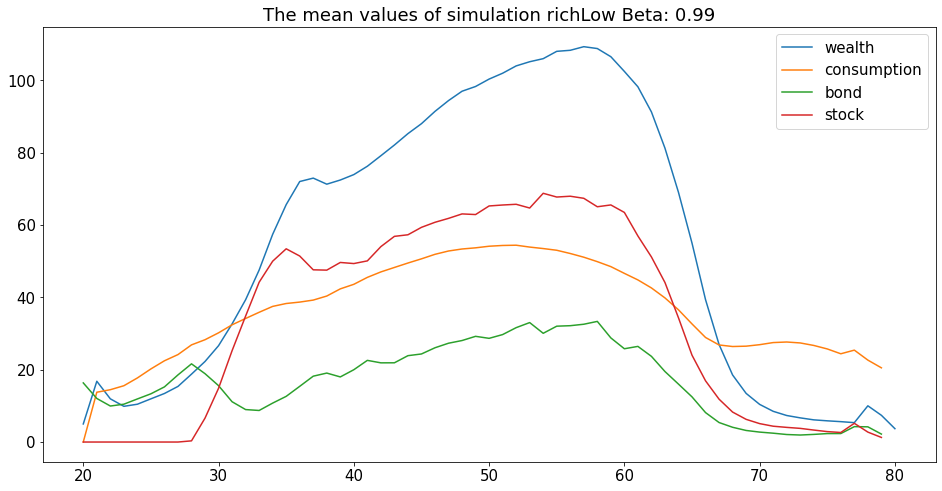

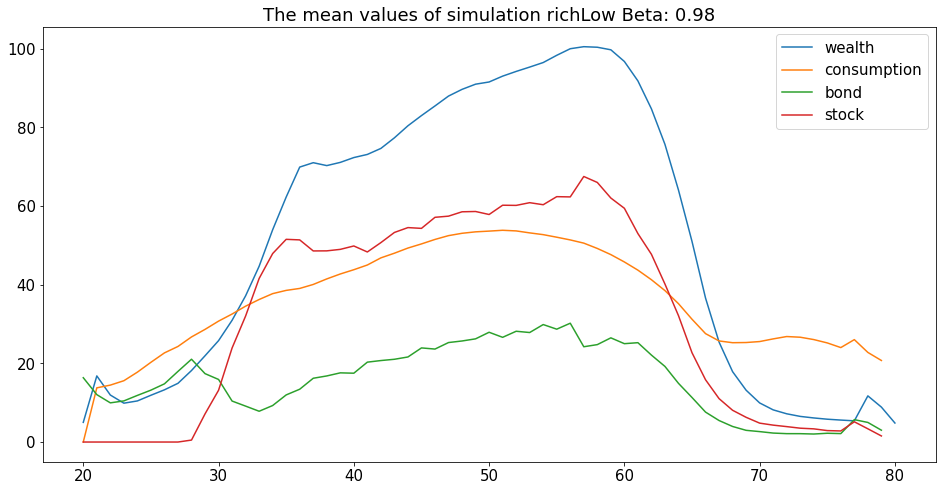

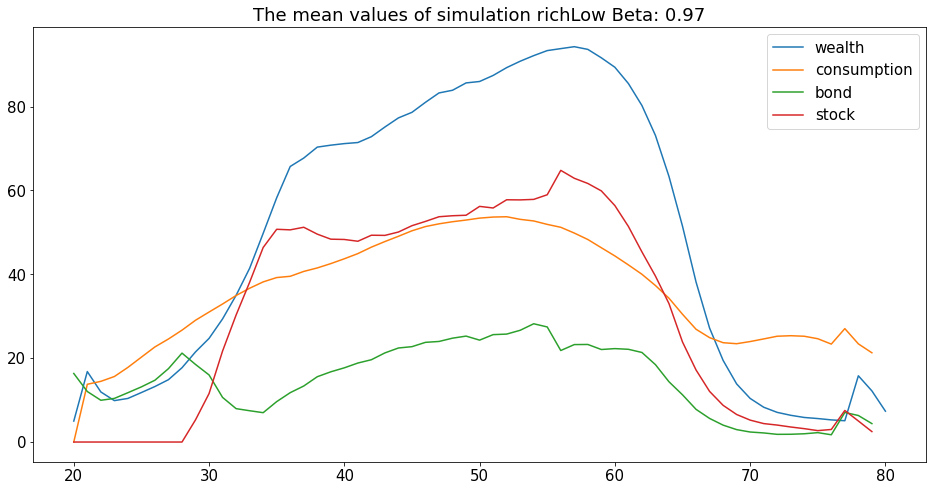

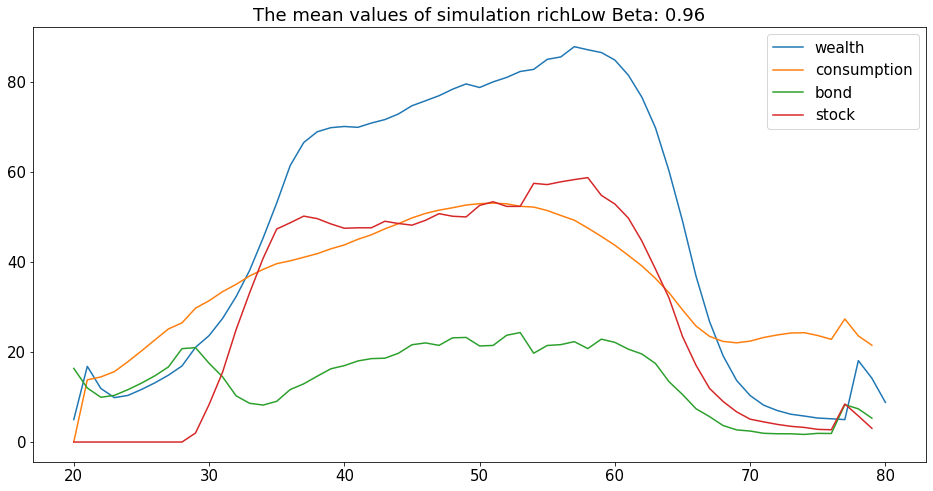

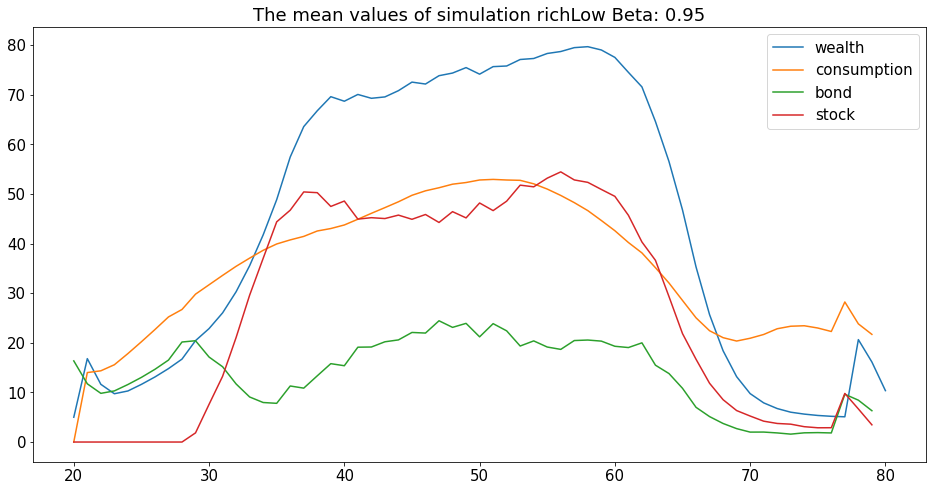

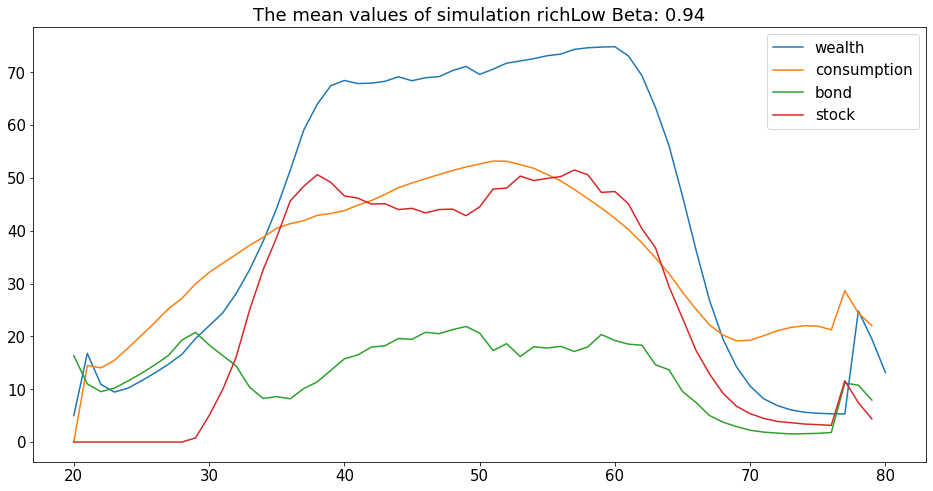

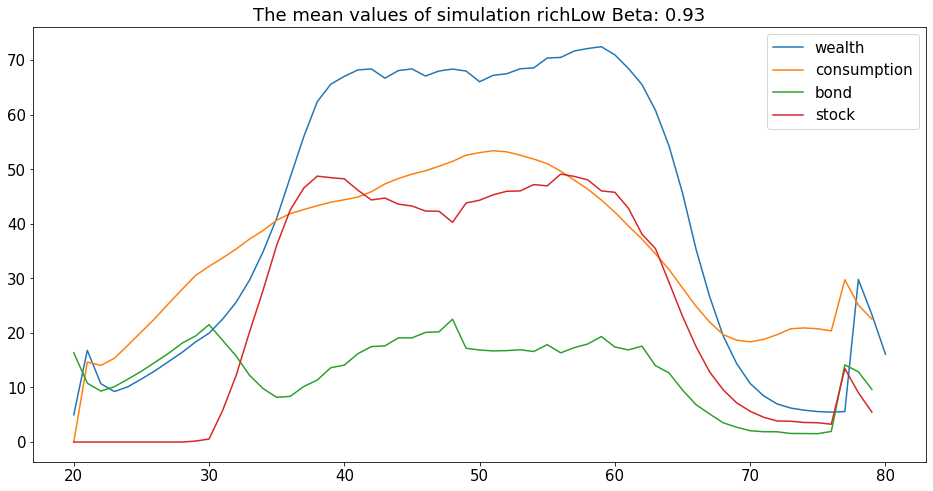

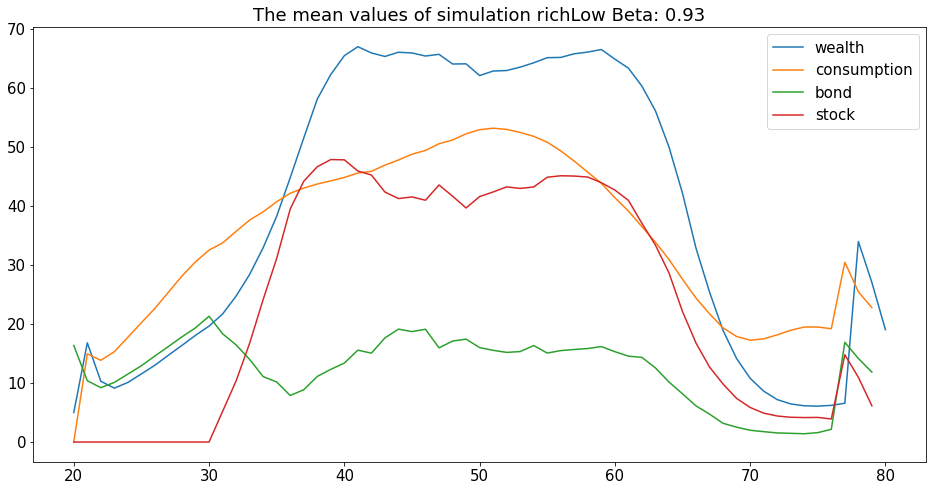

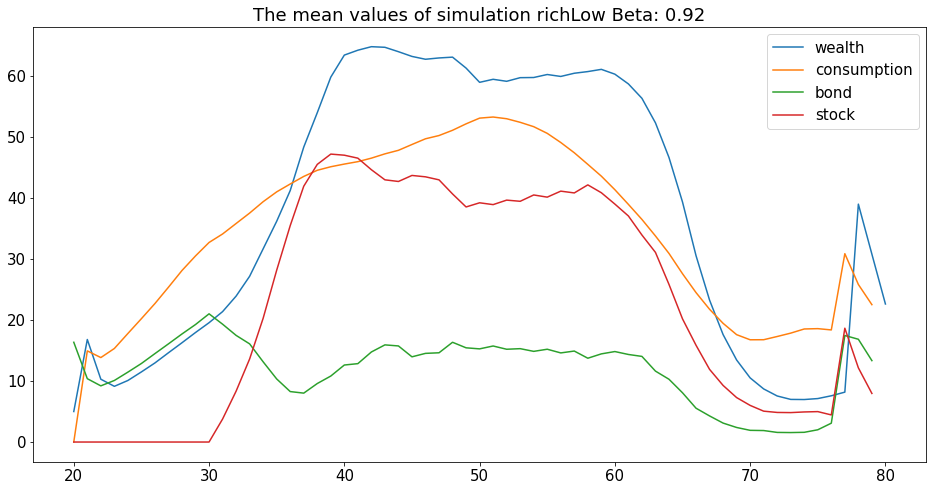

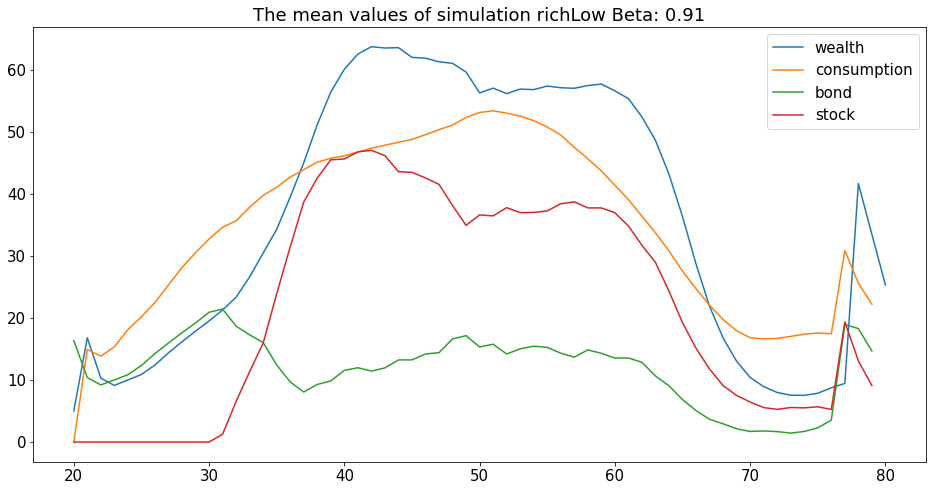

In [47]:
AgentType = ["poorHigh","poorLow","richHigh","richLow"]
Beta_r = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
# utility function parameter 
gamma = 3.0

for agentType in AgentType:
    for beta_r in Beta_r:
        fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
        [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms] = np.load("waseozcbkhm_" + fileName + ".npy", allow_pickle=True)

        plt.figure()
        plt.title("The mean values of simulation" + " " + agentType + " Beta: " + str(round(1.0/(1+beta_r),2)))
        startAge = 20
        # value of states, state has one more value, since the terminal state does not have associated action
#         plt.plot(range(startAge, T_max + startAge + 1),np.mean(ws + H*pt*os - ms,axis = 1), label = "wealth + home equity")
#         plt.plot(range(startAge, T_max + startAge + 1),np.mean(H*pt*os - ms,axis = 1), label = "home equity")
        plt.plot(range(startAge, T_max + startAge + 1),np.mean(ws,axis = 1), label = "wealth")
        # value of actions 
        plt.plot(range(startAge, T_max + startAge),np.mean(cs,axis = 1), label = "consumption")
        plt.plot(range(startAge, T_max + startAge),np.mean(bs,axis = 1), label = "bond")
        plt.plot(range(startAge, T_max + startAge),np.mean(ks,axis = 1), label = "stock")
        plt.legend()

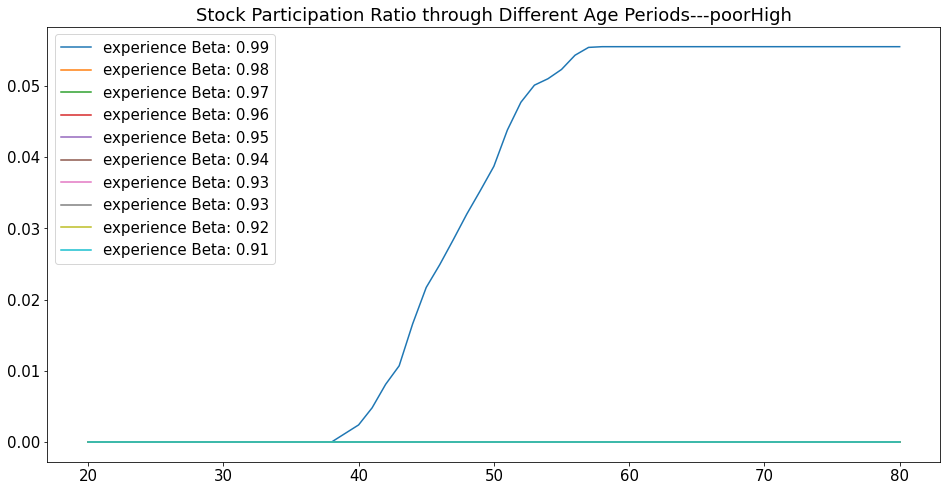

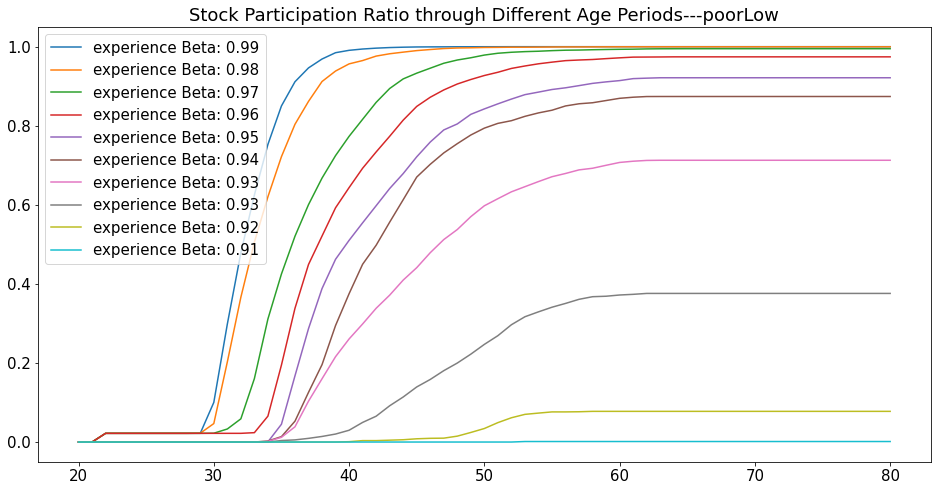

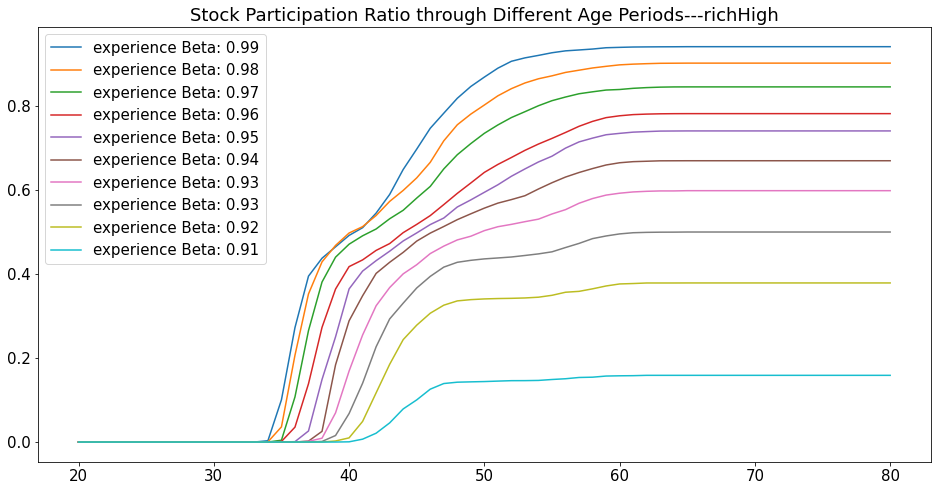

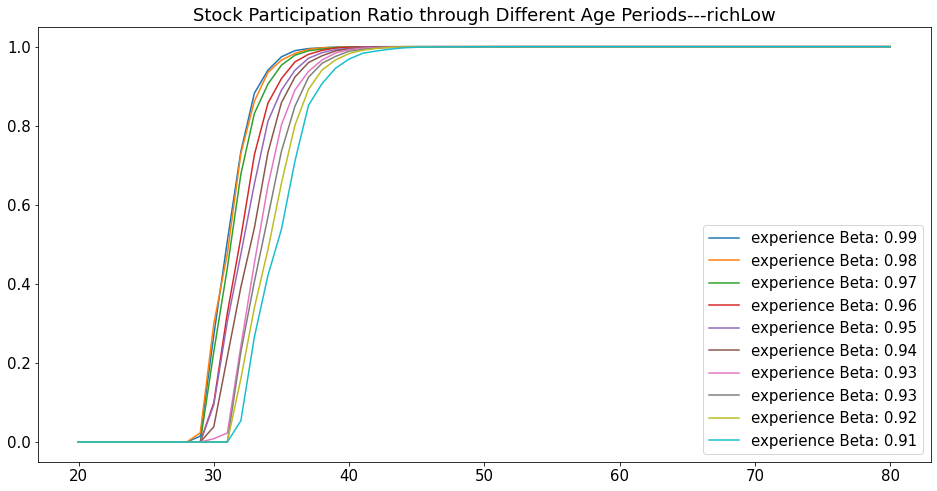

In [45]:
for agentType in AgentType:
    plt.figure()
    plt.title("Stock Participation Ratio through Different Age Periods" + "---" + agentType)
    for beta_r in Beta_r:
        fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
        [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms] = np.load("waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
        plt.plot(range(20, T_max + 21),np.mean(zs,axis = 1), label = "experience" + " Beta: " + str(round(1/(1+beta_r),2)))
        plt.legend()

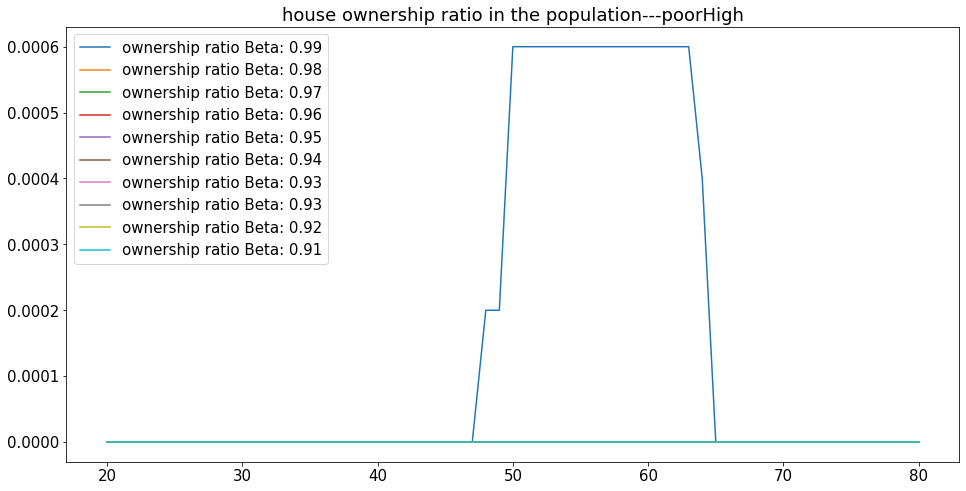

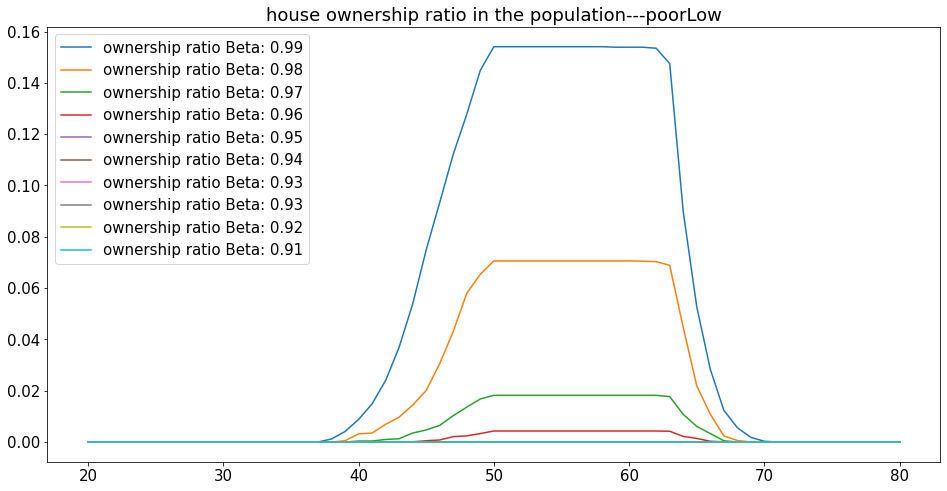

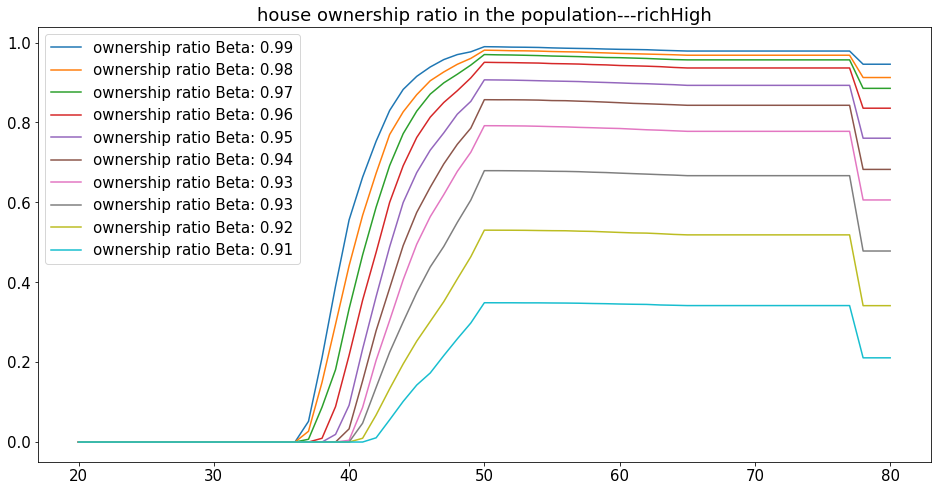

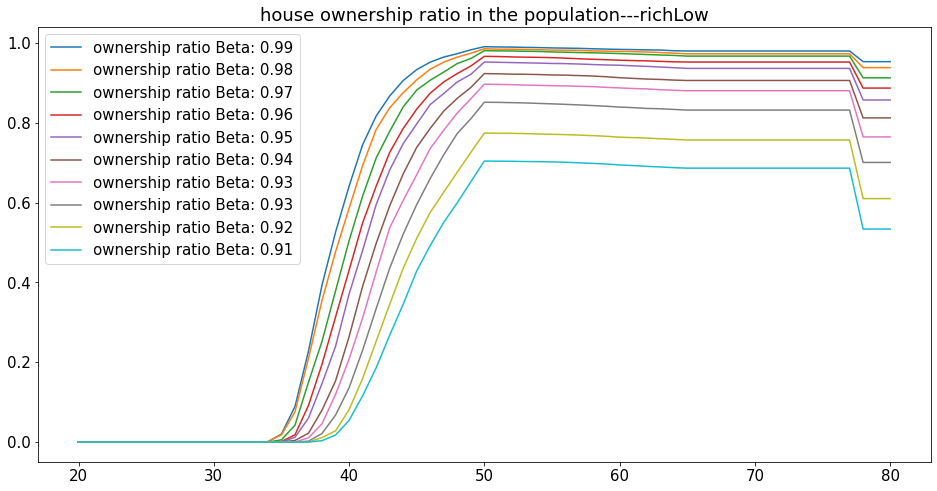

In [46]:
for agentType in AgentType:
    plt.figure()
    plt.title("house ownership ratio in the population" + "---" + agentType)
    for beta_r in Beta_r:
        fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
        [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms] = np.load("waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
        plt.plot(range(startAge, T_max + startAge + 1),(os).mean(axis = 1), label = "ownership ratio" + " Beta: " + str(round(1/(1+beta_r),2)))
        plt.legend()